In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, timezone


In [2]:
dataset = pd.read_csv('HomeC-meter1_2015.csv')

In [3]:
dataset.head()

Date & Time  use [kW]  gen [kW]  House overall [kW]  \
0  2015-01-01 00:00:00  1.167223       0.0            1.167223   
1  2015-01-01 00:30:00  1.171444       0.0            1.171444   
2  2015-01-01 01:00:00  1.151474       0.0            1.151474   
3  2015-01-01 01:30:00  1.398982       0.0            1.398982   
4  2015-01-01 02:00:00  1.080775       0.0            1.080775   

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
0         0.000236        0.229379        0.331326          0.018590   
1         0.000225        0.228758        0.300048          0.018604   
2         0.000229        0.229446        0.323099          0.018620   
3         0.000209        0.277066        0.314399          0.018593   
4         0.000239        0.228736        0.308560          0.018638   

   Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
0     0.067467          0.004420          0.009904         0.000437   
1     0.108881          0.004456          0.010001         0.000347   
2     0.005851          0.004449          0.009916         0.000612   
3     0.005925          0.004457          0.009872         0.000693   
4     0.062217          0.004478          0.010046         0.000497   

   Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  \
0         0.000060         0.000007        0.0        0.0             0.0   
1         0.000087         0.000007        0.0        0.0             0.0   
2         0.000031         0.000007        0.0        0.0             0.0   
3         0.000004         0.000007        0.0        0.0             0.0   
4         0.000032         0.000006        0.0        0.0             0.0   

   Living room [kW]  Solar [kW]  
0               0.0         0.0  
1               0.0         0.0  
2               0.0         0.0  
3               0.0         0.0  
4               0.0         0.0

In [4]:
dataset.tail()

Date & Time  use [kW]  gen [kW]  House overall [kW]  \
5400  2015-04-23 13:00:00  0.032114  0.288805            0.032114   
5401  2015-04-23 13:30:00  0.298391  0.179722            0.298391   
5402  2015-04-23 14:00:00  0.152099  0.243628            0.152099   
5403  2015-04-23 14:30:00  0.063979  0.241315            0.063979   
5404  2015-04-23 15:00:00  0.238721  0.181682            0.238721   

      Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
5400         0.000006        0.020569        0.066503          0.038459   
5401         0.000005        0.020569        0.066339          0.038436   
5402         0.000007        0.020593        0.066379          0.038477   
5403         0.000007        0.020604        0.066982          0.038531   
5404         0.000007        0.020668        0.066803          0.038513   

      Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
5400     0.017883          0.004326          0.013037         0.000682   
5401     0.126467          0.004328          0.013063         0.000414   
5402     0.041515          0.004331          0.013081         0.000626   
5403     0.005212          0.004338          0.013087         0.000723   
5404     0.100434          0.004350          0.013109         0.000488   

      Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  \
5400     6.111000e-06         0.000002   0.045659   0.000970        0.004089   
5401     6.722200e-05         0.000005   0.045674   0.000978        0.004056   
5402     2.000000e-05         0.000001   0.045687   0.000983        0.004046   
5403     5.560000e-07         0.000001   0.045911   0.000986        0.004115   
5404              NaN              NaN        NaN        NaN             NaN   

      Living room [kW]  Solar [kW]  
5400          0.001386    0.288805  
5401          0.001439    0.179722  
5402          0.001419    0.243628  
5403          0.001468    0.241315  
5404               NaN         NaN

In [5]:
dataset.columns

Index(['Date & Time', 'use [kW]', 'gen [kW]', 'House overall [kW]',
       'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
       'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]',
       'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]',
       'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
       'Living room [kW]', 'Solar [kW]'],
      dtype='object')

In [6]:
dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]
dataset.columns

Index(['Date & Time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar'],
      dtype='object')

In [7]:
dataset.describe()

use          gen  House overall   Dishwasher    Furnace 1  \
count  5405.000000  5405.000000    5405.000000  5405.000000  5405.000000   
mean      1.062477     0.022588       1.062477     0.033584     0.202645   
std       0.649206     0.082607       0.649206     0.151819     0.147333   
min       0.000271     0.000000       0.000271     0.000000     0.018311   
25%       0.620326     0.000000       0.620326     0.000029     0.094352   
50%       0.952335     0.000000       0.952335     0.000070     0.196419   
75%       1.348809     0.003461       1.348809     0.000191     0.272909   
max       5.052076     0.612035       5.052076     1.341679     1.112226   

         Furnace 2  Home office       Fridge  Wine cellar  Garage door  \
count  5405.000000  5405.000000  5405.000000  5405.000000  5405.000000   
mean      0.229095     0.070659     0.051587     0.017060     0.012151   
std       0.152471     0.106688     0.053289     0.036804     0.007686   
min       0.053646     0.013722     0.000047     0.003492     0.008082   
25%       0.067938     0.031597     0.005276     0.004297     0.009721   
50%       0.229278     0.036761     0.034406     0.004381     0.009906   
75%       0.336418     0.043006     0.092281     0.004506     0.010922   
max       0.715528     0.729767     0.471068     1.226867     0.200099   

        Kitchen 12   Kitchen 14   Kitchen 38         Barn         Well  \
count  5405.000000  5404.000000  5404.000000  5404.000000  5404.000000   
mean      0.002142     0.008683     0.000007     0.028471     0.005317   
std       0.014659     0.034094     0.000005     0.103707     0.024694   
min       0.000001     0.000000     0.000000     0.000000     0.000000   
25%       0.000468     0.000039     0.000003     0.000000     0.000000   
50%       0.000595     0.000094     0.000006     0.000000     0.000000   
75%       0.000698     0.000206     0.000010     0.040635     0.000971   
max       0.445944     0.439996     0.000031     2.237953     0.303764   

         Microwave  Living room        Solar  
count  5404.000000  5404.000000  5404.000000  
mean      0.003134     0.012388     0.022558  
std       0.018187     0.055693     0.082587  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.004004     0.001456     0.003461  
max       0.640686     0.359871     0.612035

In [8]:
dataset.shape

(5405, 19)

In [9]:
#Checking null values
dataset.isnull().sum()

Date & Time      0
use              0
gen              0
House overall    0
Dishwasher       0
Furnace 1        0
Furnace 2        0
Home office      0
Fridge           0
Wine cellar      0
Garage door      0
Kitchen 12       0
Kitchen 14       1
Kitchen 38       1
Barn             1
Well             1
Microwave        1
Living room      1
Solar            1
dtype: int64

In [10]:
dataset.isna().sum()

Date & Time      0
use              0
gen              0
House overall    0
Dishwasher       0
Furnace 1        0
Furnace 2        0
Home office      0
Fridge           0
Wine cellar      0
Garage door      0
Kitchen 12       0
Kitchen 14       1
Kitchen 38       1
Barn             1
Well             1
Microwave        1
Living room      1
Solar            1
dtype: int64

In [11]:
# Check if there are entries with null values
display(dataset.info())
dataset[dataset.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5405 entries, 0 to 5404
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date & Time    5405 non-null   object 
 1   use            5405 non-null   float64
 2   gen            5405 non-null   float64
 3   House overall  5405 non-null   float64
 4   Dishwasher     5405 non-null   float64
 5   Furnace 1      5405 non-null   float64
 6   Furnace 2      5405 non-null   float64
 7   Home office    5405 non-null   float64
 8   Fridge         5405 non-null   float64
 9   Wine cellar    5405 non-null   float64
 10  Garage door    5405 non-null   float64
 11  Kitchen 12     5405 non-null   float64
 12  Kitchen 14     5404 non-null   float64
 13  Kitchen 38     5404 non-null   float64
 14  Barn           5404 non-null   float64
 15  Well           5404 non-null   float64
 16  Microwave      5404 non-null   float64
 17  Living room    5404 non-null   float64
 18  Solar   

None

Date & Time       use       gen  House overall  Dishwasher  \
5404  2015-04-23 15:00:00  0.238721  0.181682       0.238721    0.000007   

      Furnace 1  Furnace 2  Home office    Fridge  Wine cellar  Garage door  \
5404   0.020668   0.066803     0.038513  0.100434      0.00435     0.013109   

      Kitchen 12  Kitchen 14  Kitchen 38  Barn  Well  Microwave  Living room  \
5404    0.000488         NaN         NaN   NaN   NaN        NaN          NaN   

      Solar  
5404    NaN

In [12]:
dataset['Date & Time'].head()

0    2015-01-01 00:00:00
1    2015-01-01 00:30:00
2    2015-01-01 01:00:00
3    2015-01-01 01:30:00
4    2015-01-01 02:00:00
Name: Date & Time, dtype: object

In [13]:
dataset.shape

(5405, 19)

<AxesSubplot:>

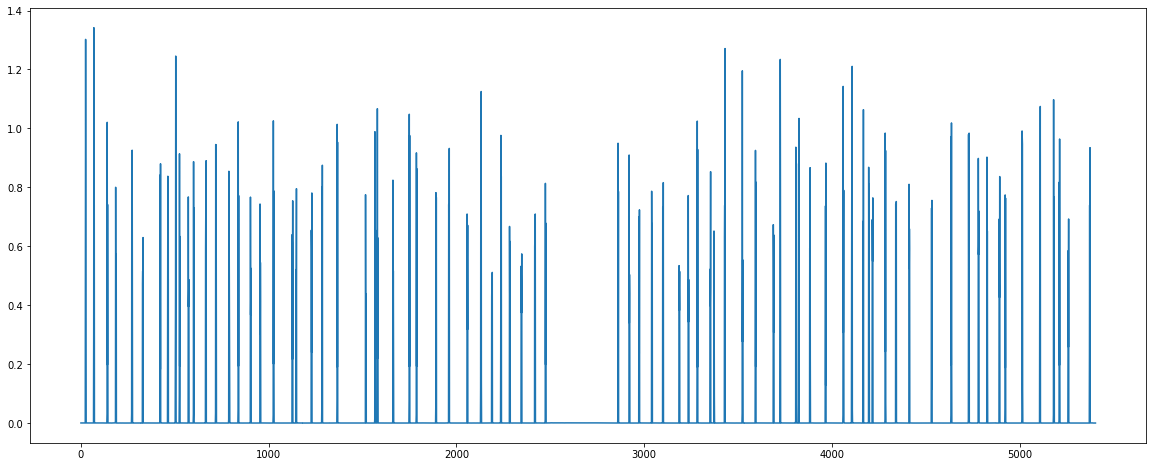

In [14]:
dataset['Dishwasher'].plot(figsize=(20,8))

In [15]:
dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['sum_Kitchen'] = dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [16]:
dataset = dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)
dataset.columns

Index(['Date & Time', 'use', 'gen', 'House overall', 'Dishwasher',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well',
       'Microwave', 'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [17]:
dataset.shape

(5405, 16)

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)

In [19]:
# Convert the 'Datetime' column to a datetime object and set it as the index
dataset['Date & Time'] = pd.to_datetime(dataset['Date & Time'])
dataset.set_index(['Date & Time'], inplace=True)


<AxesSubplot:xlabel='Date & Time'>

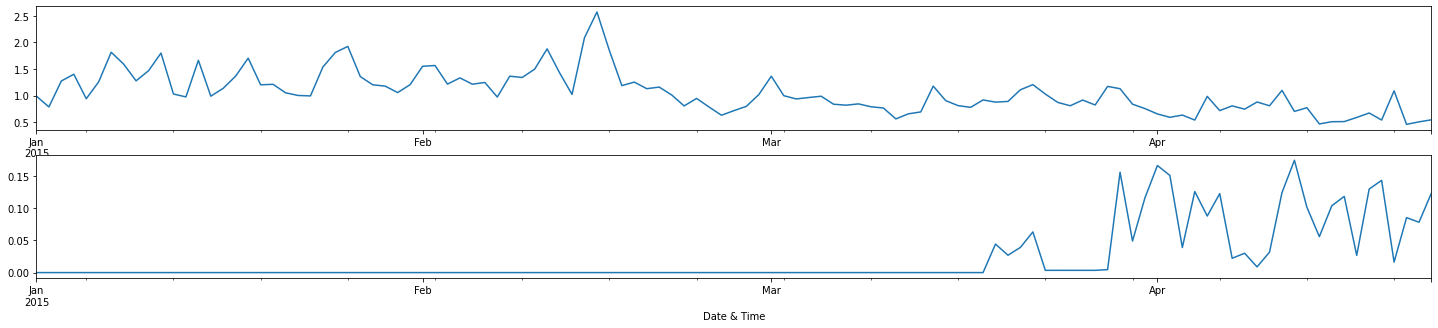

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataset['use'].resample('D').mean().plot(ax=axes[0])
dataset['gen'].resample('D').mean().plot(ax=axes[1])

In [21]:
dataset['Barn'].value_counts()

0.000000    3724
0.035983       2
0.043609       2
0.053920       2
0.043032       2
            ... 
0.031258       1
0.031264       1
0.031343       1
0.031548       1
0.045911       1
Name: Barn, Length: 1657, dtype: int64

<AxesSubplot:xlabel='Date & Time'>

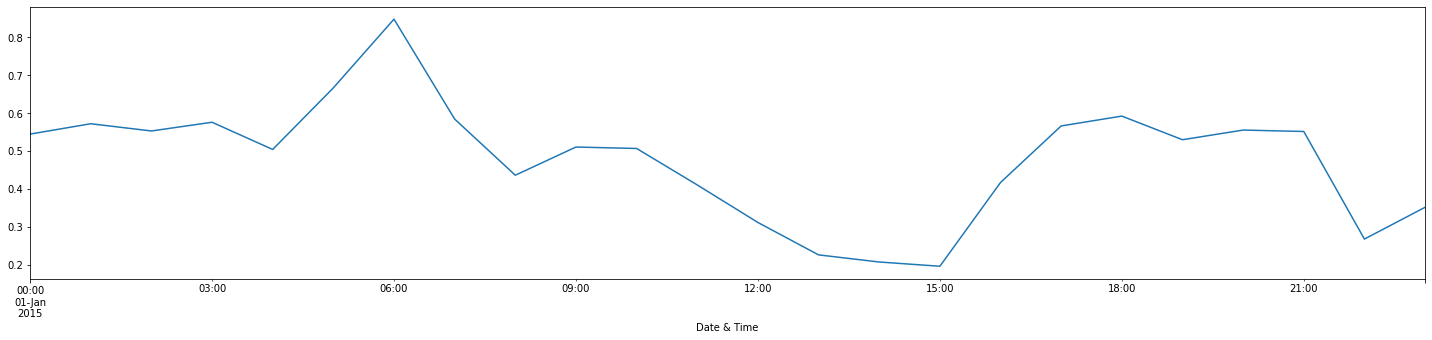

In [22]:
dataset['sum_Furnace'].resample("h").mean().iloc[:24].plot()

In [23]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [24]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [25]:
dataset.columns


Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [27]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: use
Test Statistic                -8.222846e+00
p-value                        6.360904e-13
No Lags Used                   2.900000e+01
Number of Observations Used    5.375000e+03
Critical Value (1%)           -3.431567e+00
Critical Value (5%)           -2.862078e+00
Critical Value (10%)          -2.567056e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: gen
Test Statistic                -7.995060e+00
p-value                        2.416643e-12
No Lags Used                   3.300000e+01
Number of Observations Used    5.371000e+03
Critical Value (1%)           -3.431568e+00
Critical Value (5%)           -2.862078e+00
Critical Value (10%)          -2.567057e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: House overall
Test Statistic                -8.222846e+00
p-value                        6

In [28]:
X = dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen' ]]
train, test = X[0:-30], X[-30:]

In [29]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [30]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load data
# data = pd.read_csv('data.csv', index_col='Time', parse_dates=['Time'])

# Differencing
dataset['living_room_diff'] = dataset['Living room'].diff()
dataset['solar_diff'] = dataset['Solar'].diff()

# # Drop NaN values
# data.dropna(inplace=True)
# Replace NaN and Inf values with 0
dataset = dataset.replace([np.inf, -np.inf, np.nan], 0)

# Augmented Dickey-Fuller test
result_living_room = adfuller(dataset['living_room_diff'])
result_solar = adfuller(dataset['solar_diff'])

print('Living room:')
print(f'ADF Statistic: {result_living_room[0]}')
print(f'p-value: {result_living_room[1]}')
print(f'Critical Values: {result_living_room[4]}')
if result_living_room[0] < result_living_room[4]['5%']:
    print('Stationary')
else:
    print('Non-Stationary')

print('Solar:')
print(f'ADF Statistic: {result_solar[0]}')
print(f'p-value: {result_solar[1]}')
print(f'Critical Values: {result_solar[4]}')
if result_solar[0] < result_solar[4]['5%']:
    print('Stationary')
else:
    print('Non-Stationary')

Living room:
ADF Statistic: -23.56070597109783
p-value: 0.0
Critical Values: {'1%': -3.431566968962844, '5%': -2.8620777769642496, '10%': -2.56705625790689}
Stationary
Solar:
ADF Statistic: -25.379074406884794
p-value: 0.0
Critical Values: {'1%': -3.4315681024122298, '5%': -2.8620782777314395, '10%': -2.5670565244821923}
Stationary


In [31]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [32]:
!pip install pmdarima

from pmdarima import auto_arima



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.8 MB/s eta 0:00:00


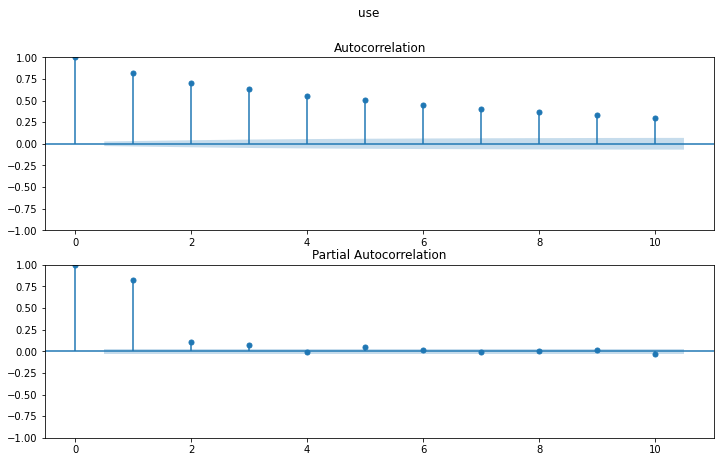

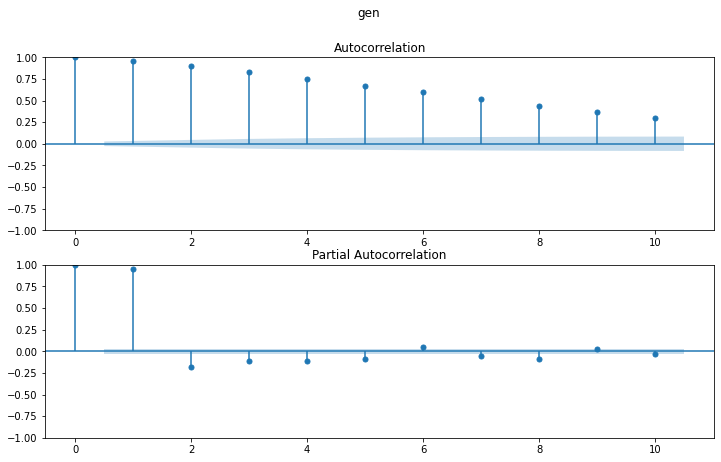

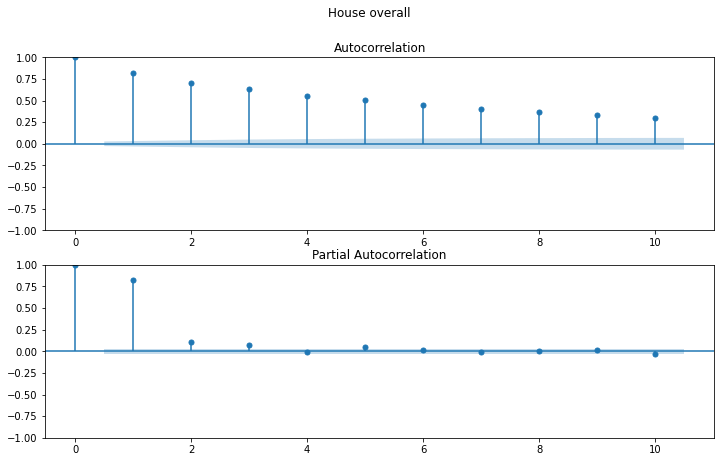

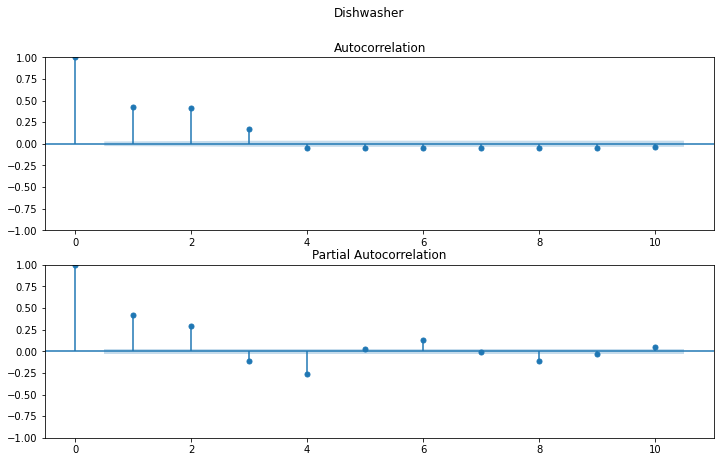

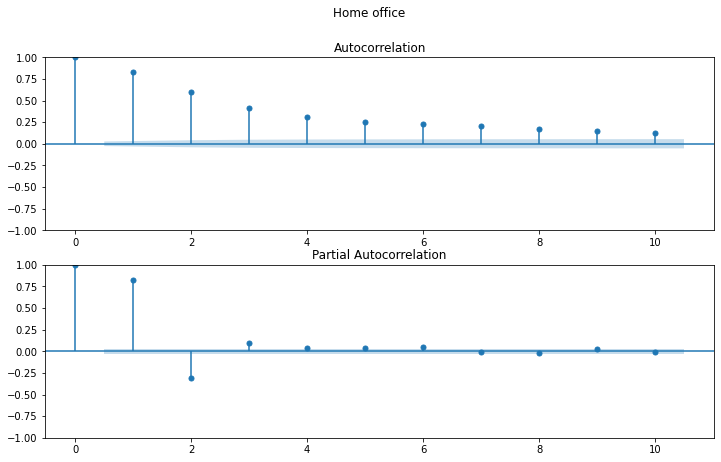

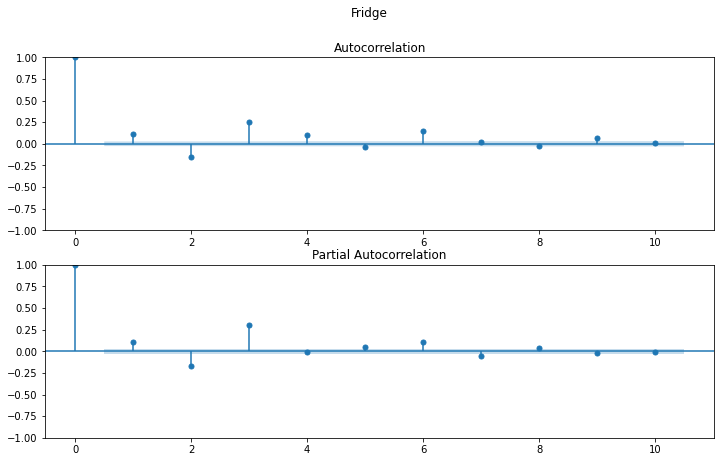

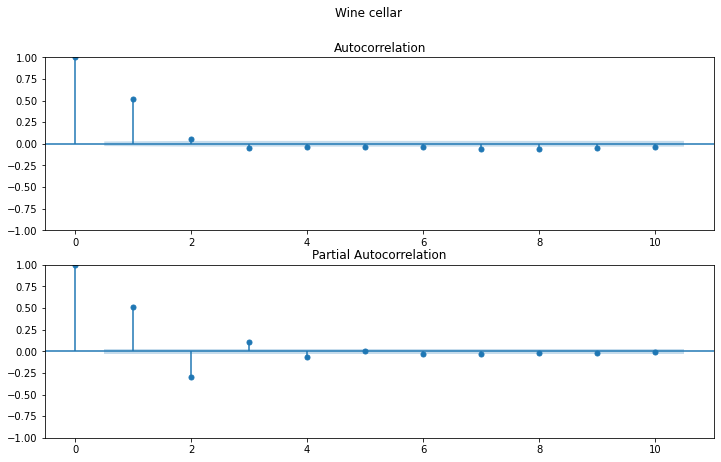

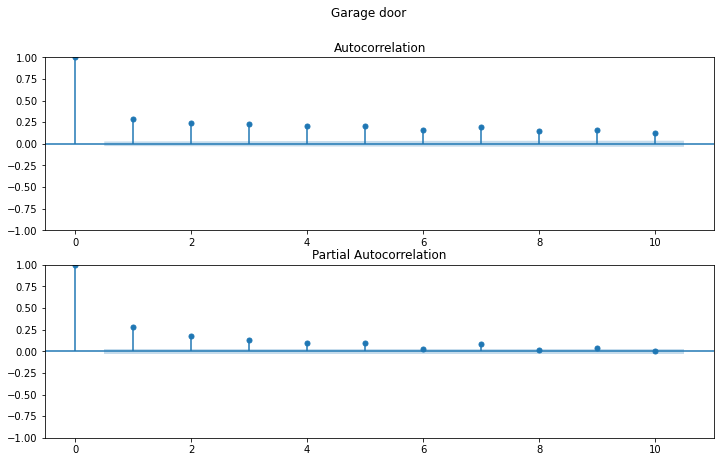

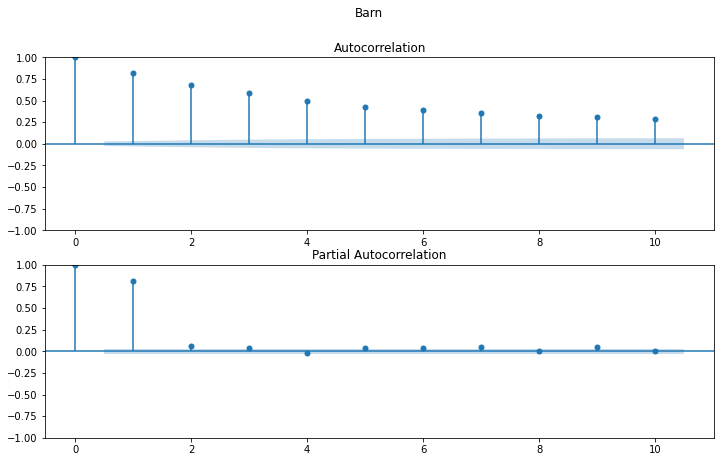

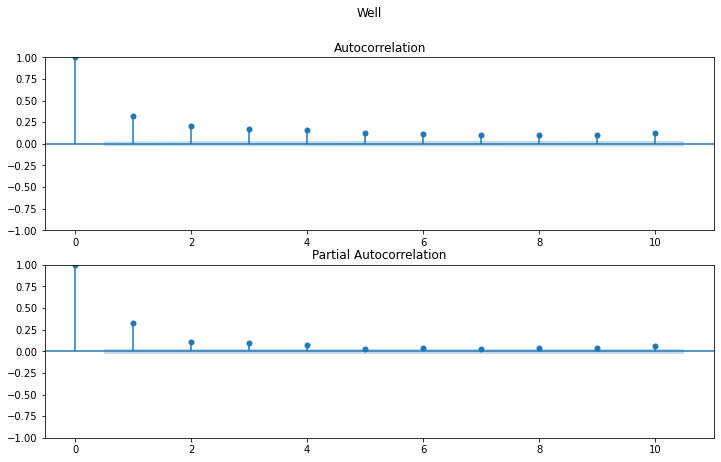

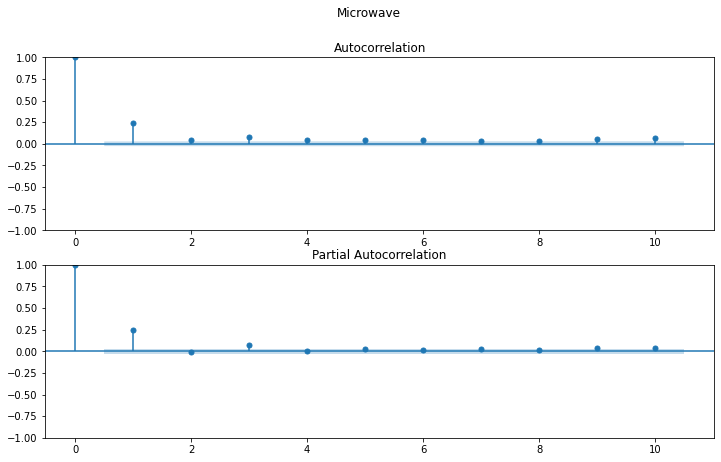

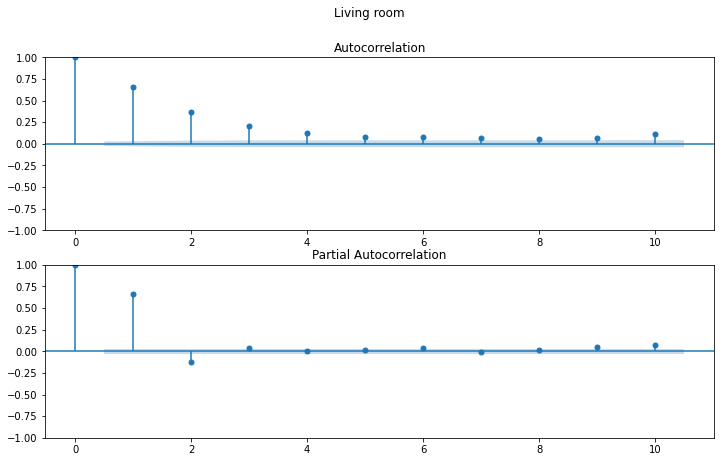

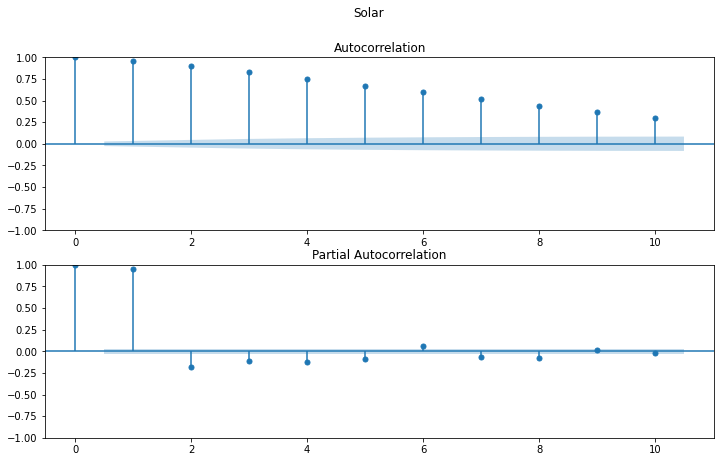

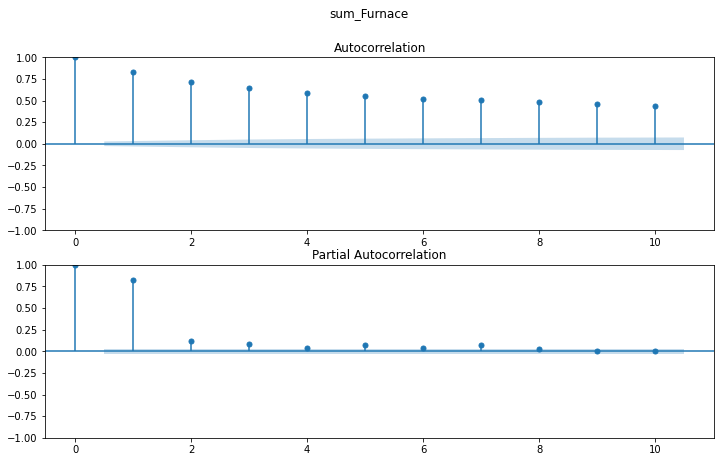

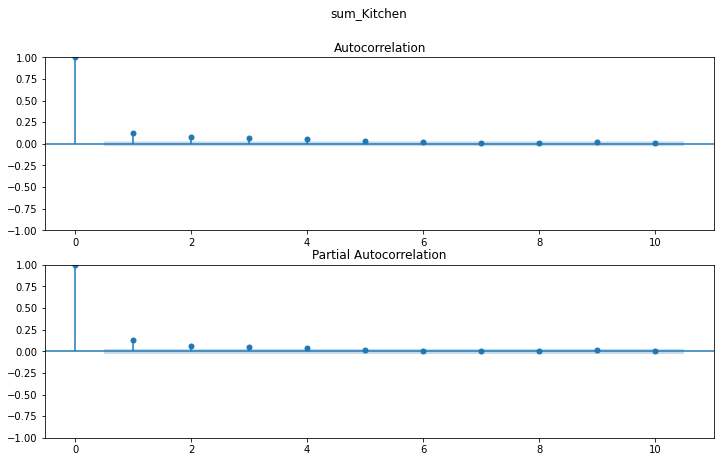

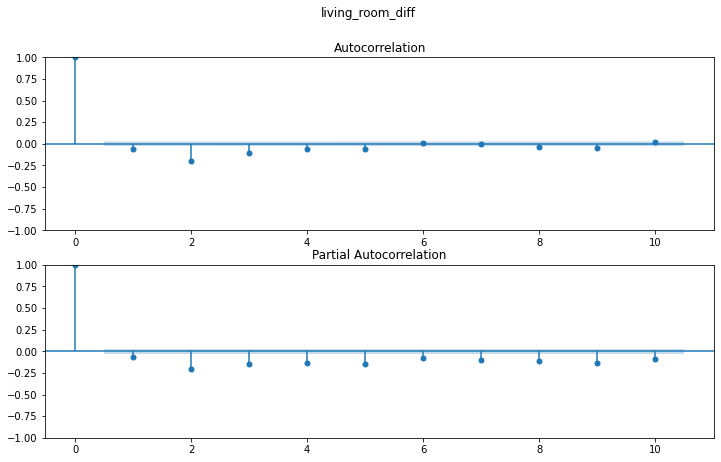

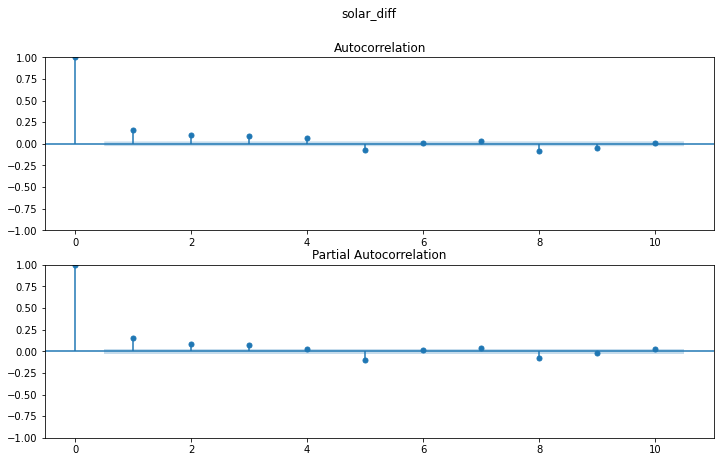

In [33]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Loop through each column in the dataset
for col in dataset.columns:
    # Create a new figure
    fig = plt.figure(figsize=(12,7))
    
    # Add subplots for the ACF and PACF
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dataset[col].values.squeeze(), lags=10, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dataset[col], lags=10, ax=ax2)
    
    # Set the title to the column name
    fig.suptitle(col)
    
    # Show the plot
    plt.show()

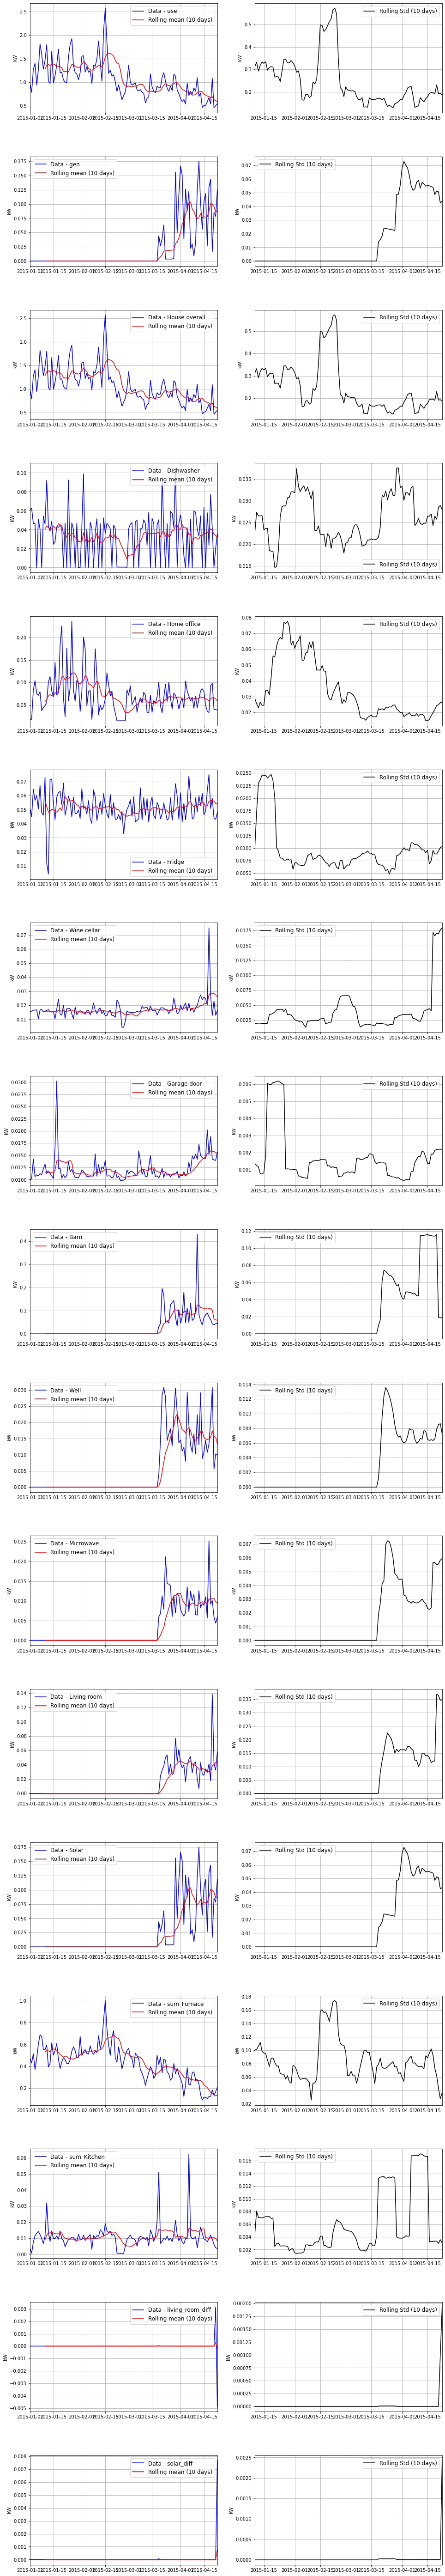

In [34]:
# Resample each column of the dataset and calculate rolling mean and standard deviation
rolling_window = 10
data_daily = dataset.resample('d').mean()
rolling_mean = data_daily.rolling(window=rolling_window).mean()
rolling_std = data_daily.rolling(window=rolling_window).std()

# Plot the results for each column
fig, axs = plt.subplots(len(dataset.columns), 2, figsize=(16, 6*len(dataset.columns)))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(dataset.columns):
    axs[i, 0].plot(data_daily[col], c='blue', label=f'Data - {col}')
    axs[i, 0].plot(rolling_mean[col], c='red', label=f'Rolling mean ({rolling_window} days)')
    axs[i, 0].legend(fontsize=12)
    axs[i, 0].set_ylabel('kW')
    axs[i, 0].margins(x=0)
    axs[i, 0].grid()
    
    axs[i, 1].plot(rolling_std[col], c='black', label=f'Rolling Std ({rolling_window} days)')
    axs[i, 1].legend(fontsize=12)
    axs[i, 1].set_ylabel('kW')
    axs[i, 1].margins(x=0)
    axs[i, 1].grid()
    
plt.show()


In [35]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [36]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [37]:
dataset.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen',
       'living_room_diff', 'solar_diff'],
      dtype='object')

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [39]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: use
Test Statistic                -8.222846e+00
p-value                        6.360904e-13
No Lags Used                   2.900000e+01
Number of Observations Used    5.375000e+03
Critical Value (1%)           -3.431567e+00
Critical Value (5%)           -2.862078e+00
Critical Value (10%)          -2.567056e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: gen
Test Statistic                -7.995060e+00
p-value                        2.416643e-12
No Lags Used                   3.300000e+01
Number of Observations Used    5.371000e+03
Critical Value (1%)           -3.431568e+00
Critical Value (5%)           -2.862078e+00
Critical Value (10%)          -2.567057e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: House overall
Test Statistic                -8.222846e+00
p-value                        6

In [40]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [41]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: use
Test Statistic                -8.222846e+00
p-value                        6.360904e-13
No Lags Used                   2.900000e+01
Number of Observations Used    5.375000e+03
Critical Value (1%)           -3.431567e+00
Critical Value (5%)           -2.862078e+00
Critical Value (10%)          -2.567056e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: gen
Test Statistic                -7.995060e+00
p-value                        2.416643e-12
No Lags Used                   3.300000e+01
Number of Observations Used    5.371000e+03
Critical Value (1%)           -3.431568e+00
Critical Value (5%)           -2.862078e+00
Critical Value (10%)          -2.567057e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: House overall
Test Statistic                -8.222846e+00
p-value                        6

In [42]:
X = dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen' ]]
train, test = X[0:-30], X[-30:]

In [43]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [44]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: use
Test Statistic                -8.222846e+00
p-value                        6.360904e-13
No Lags Used                   2.900000e+01
Number of Observations Used    5.375000e+03
Critical Value (1%)           -3.431567e+00
Critical Value (5%)           -2.862078e+00
Critical Value (10%)          -2.567056e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: gen
Test Statistic                -7.995060e+00
p-value                        2.416643e-12
No Lags Used                   3.300000e+01
Number of Observations Used    5.371000e+03
Critical Value (1%)           -3.431568e+00
Critical Value (5%)           -2.862078e+00
Critical Value (10%)          -2.567057e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: House overall
Test Statistic                -8.222846e+00
p-value                        6

In [45]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [46]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))

Number of points in series: 113
Number of points in train: 79
Number of points in test: 34


In [47]:

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller, grangercausalitytests
import statsmodels.tsa.vector_ar.vecm as vecm
from statsmodels.tsa.api import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.decomposition import PCA


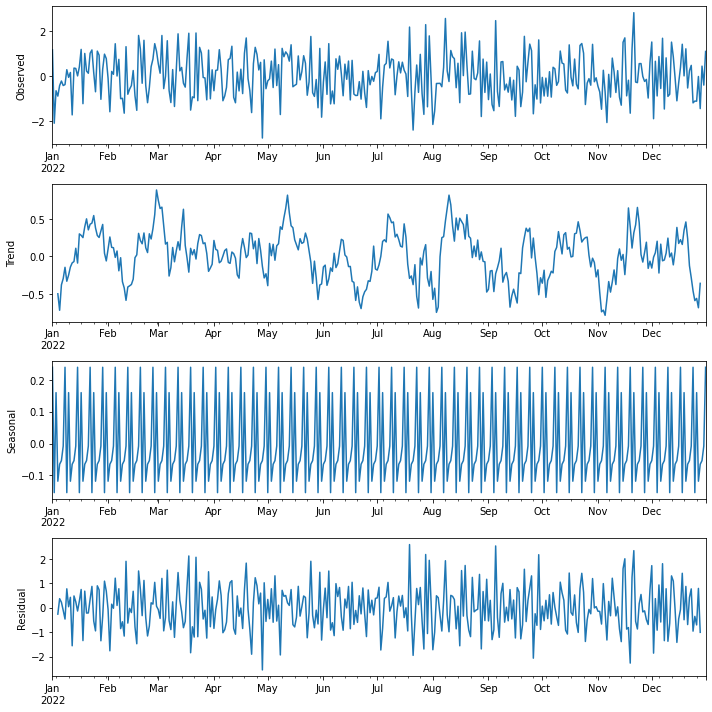

In [48]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# create a sample time series with daily data
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data_daily = pd.Series(np.random.randn(len(dates)), index=dates)

# decompose the data using seasonal_decompose
result = seasonal_decompose(data_daily, model='additive')

# plot the decomposition using matplotlib
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()


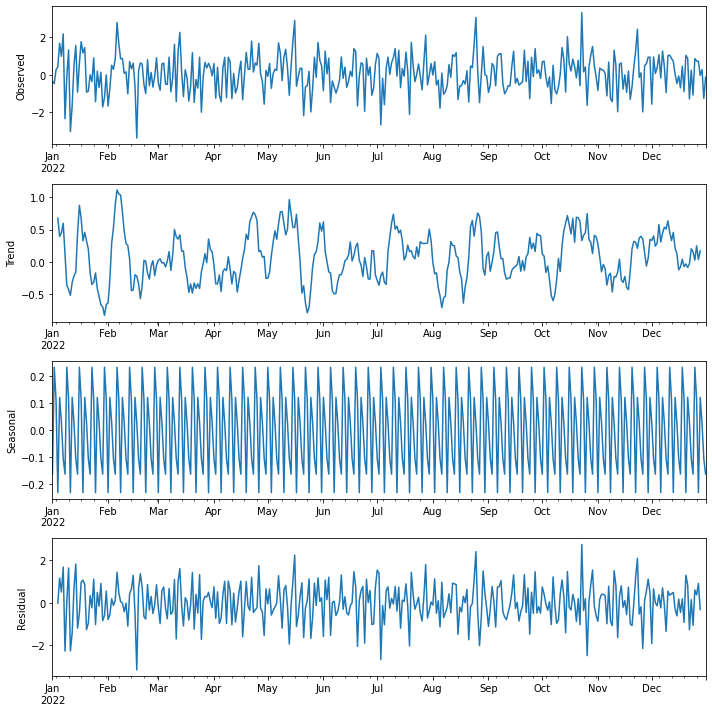

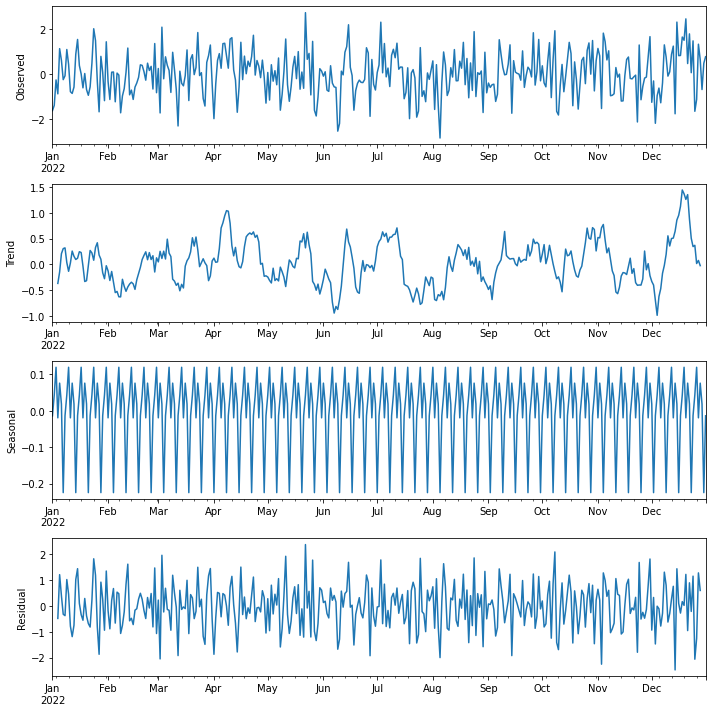

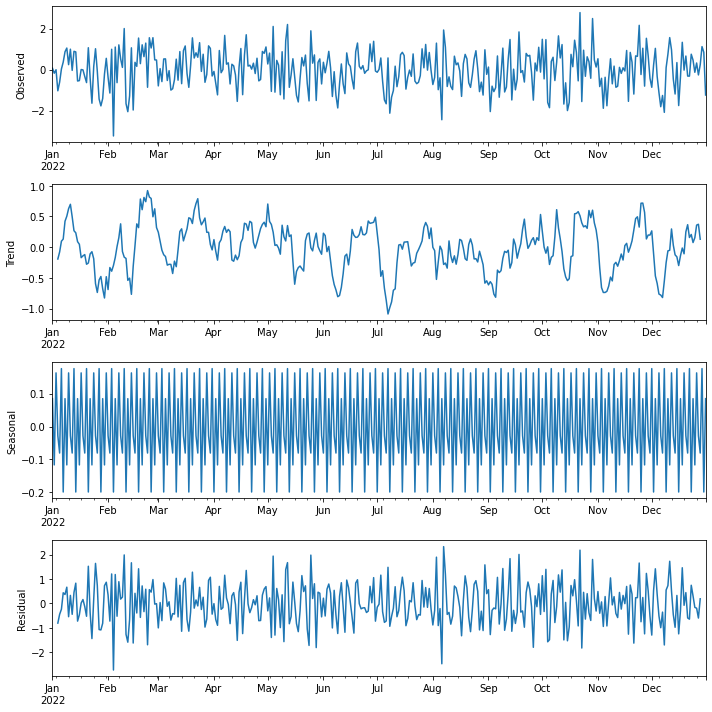

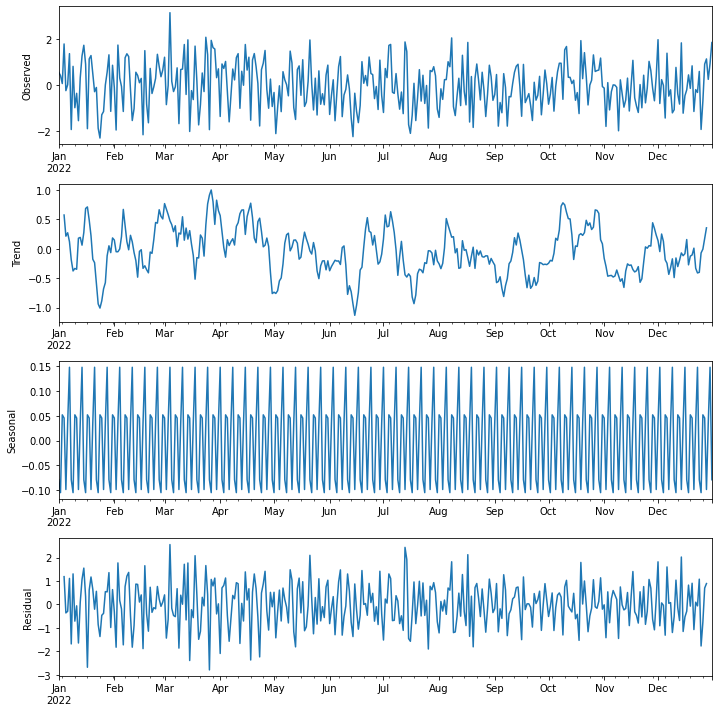

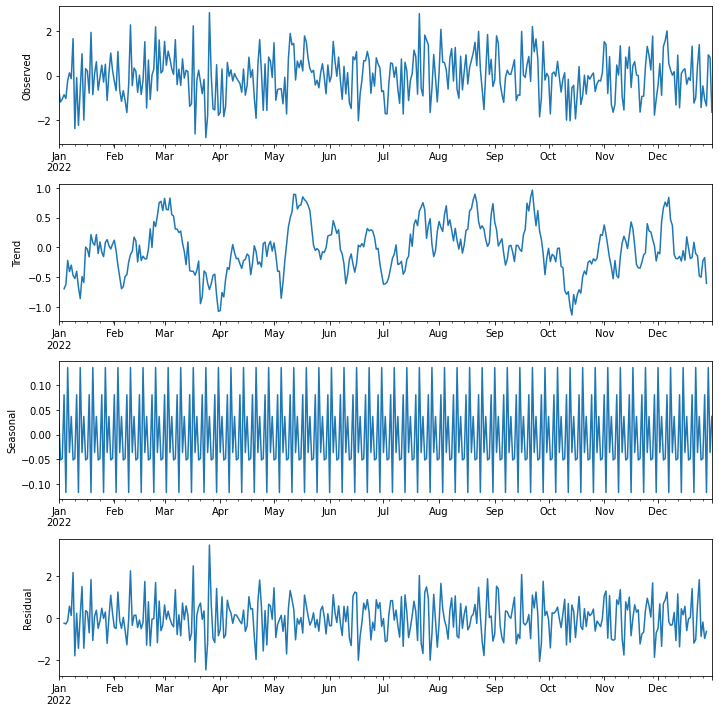

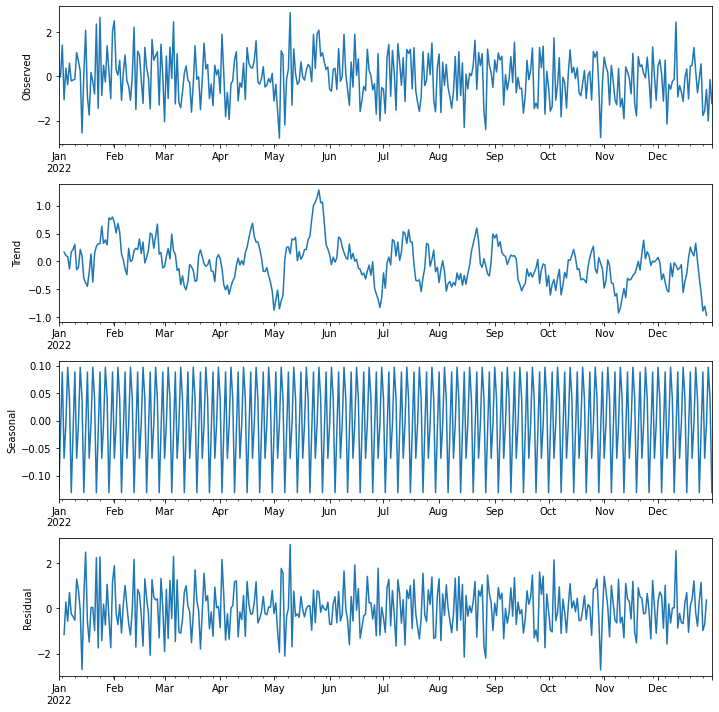

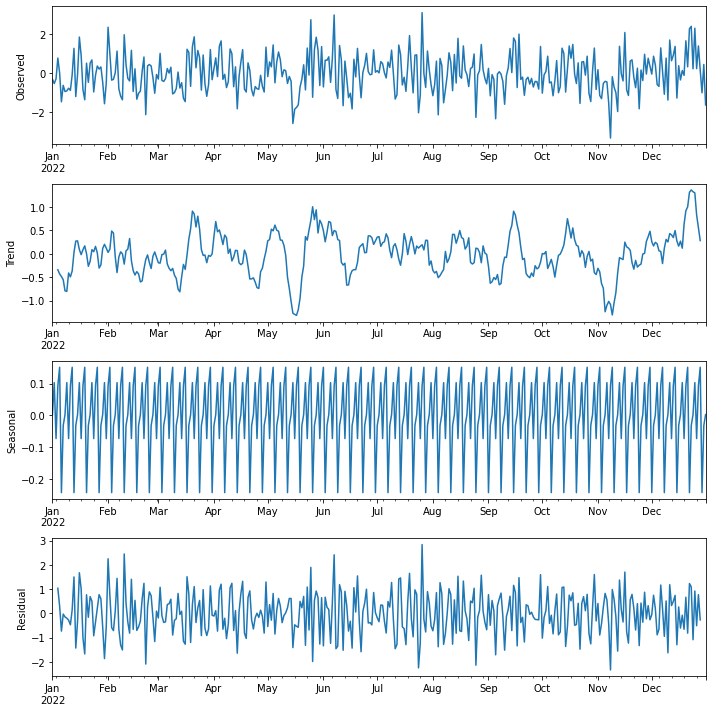

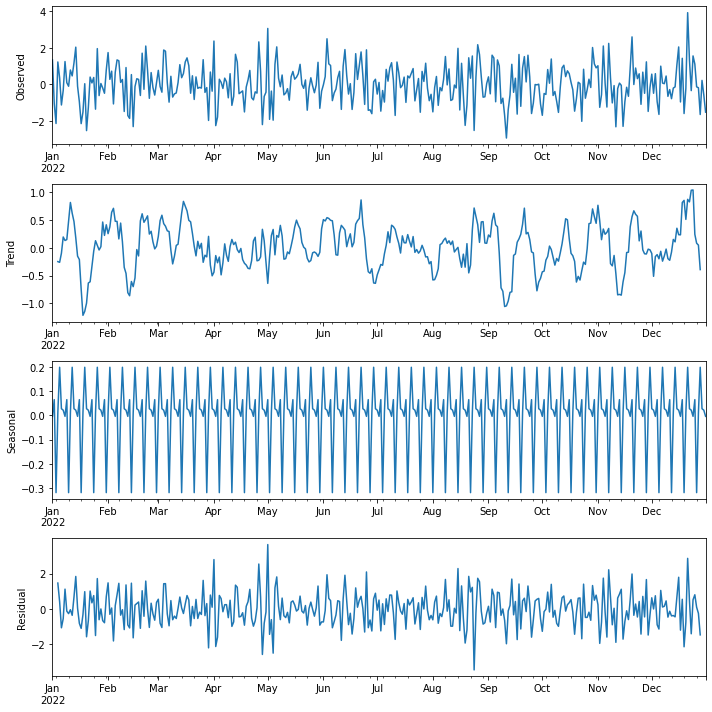

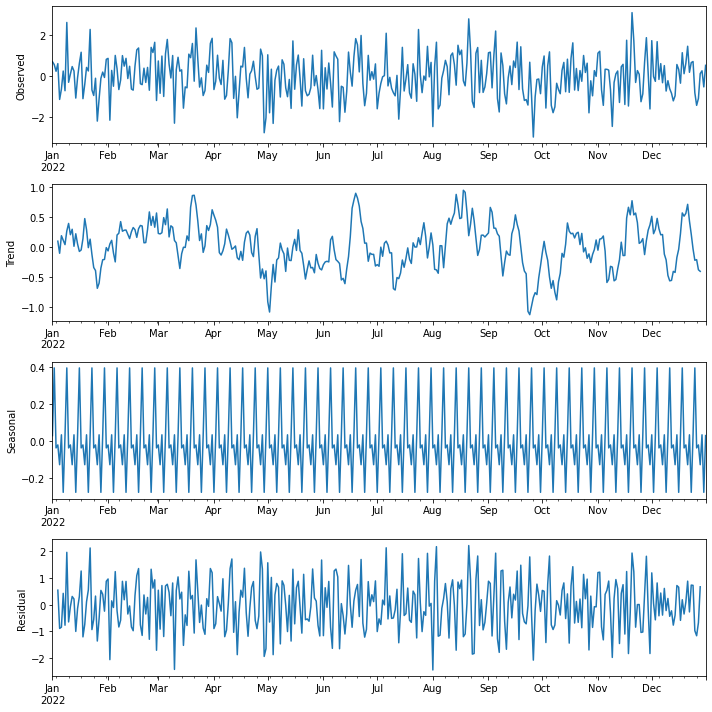

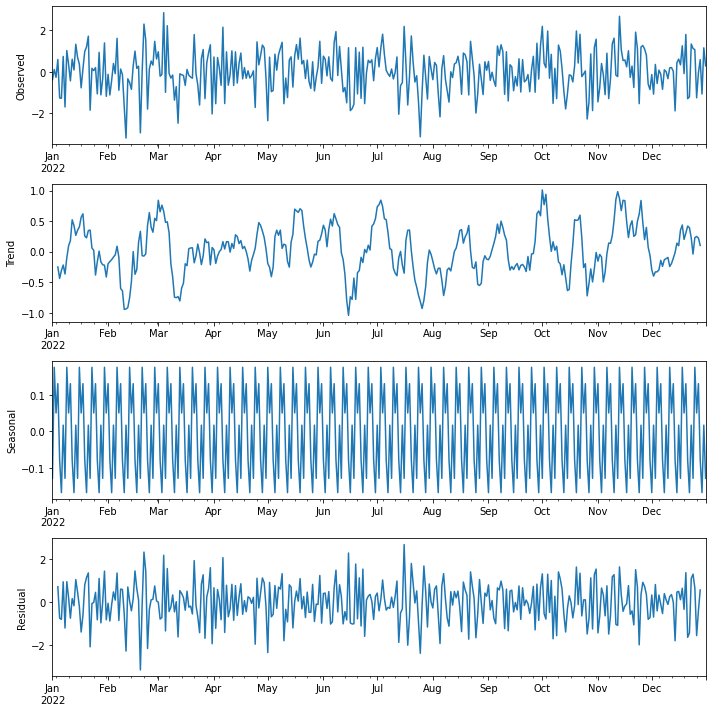

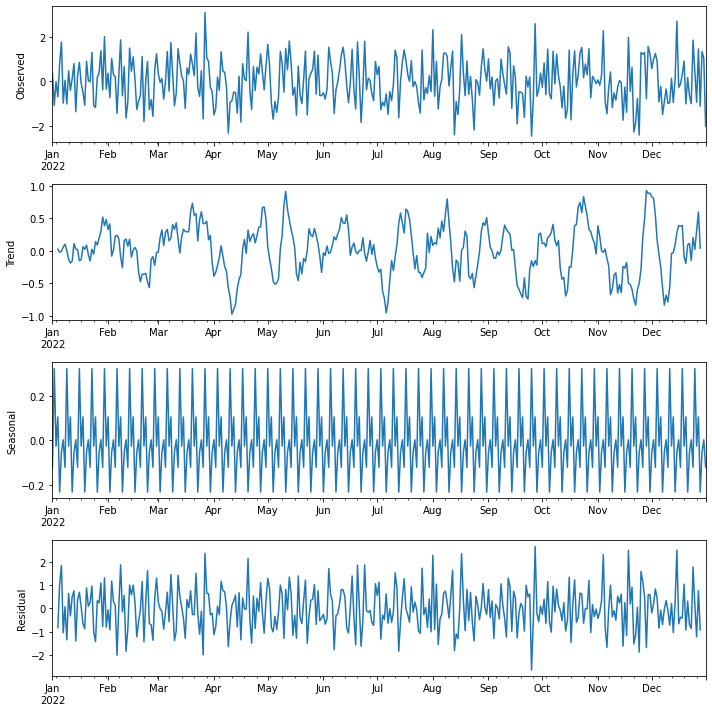

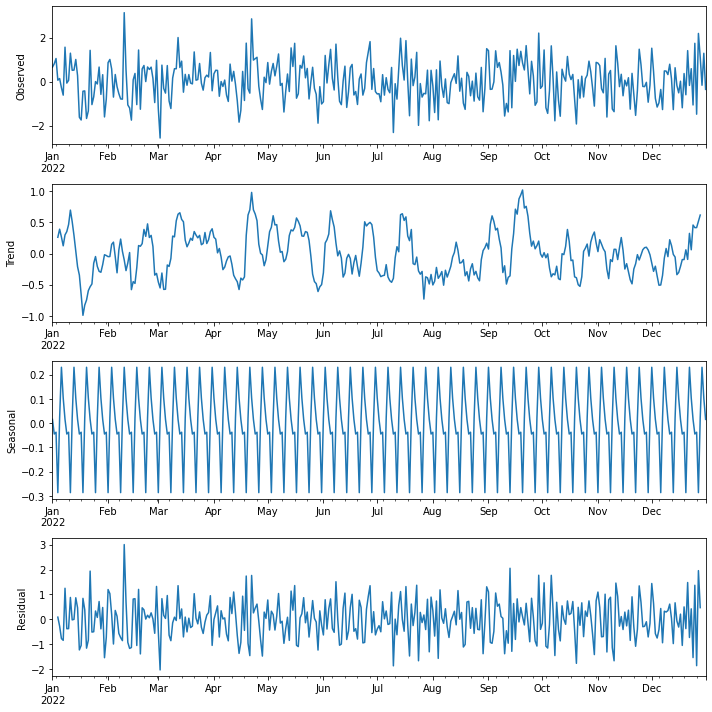

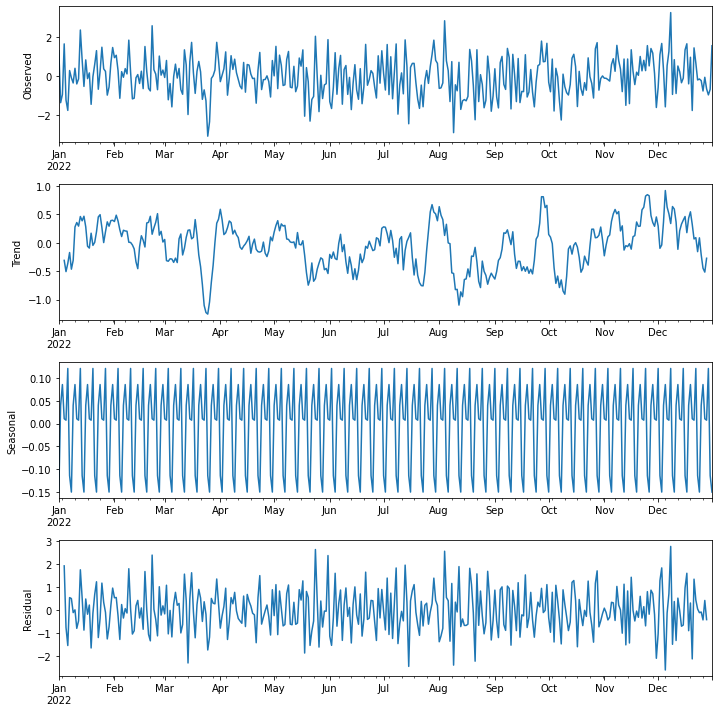

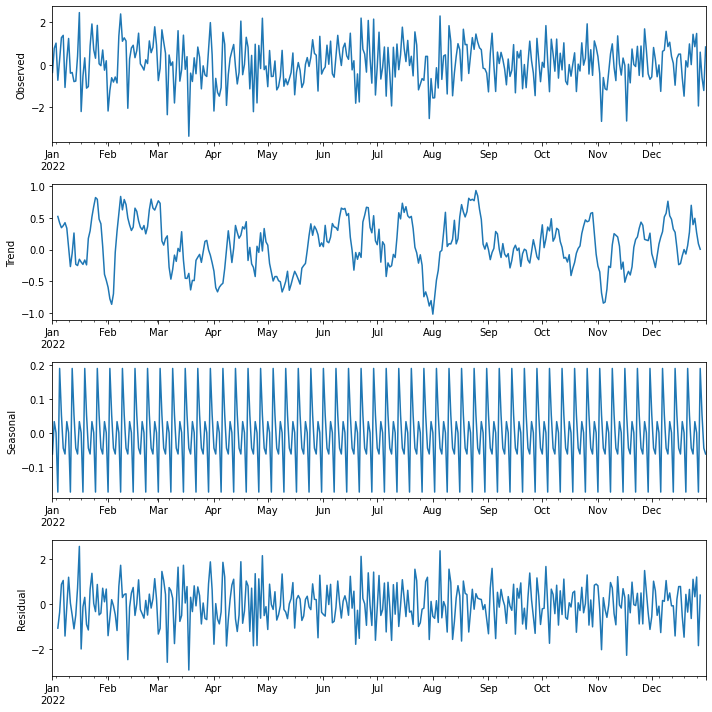

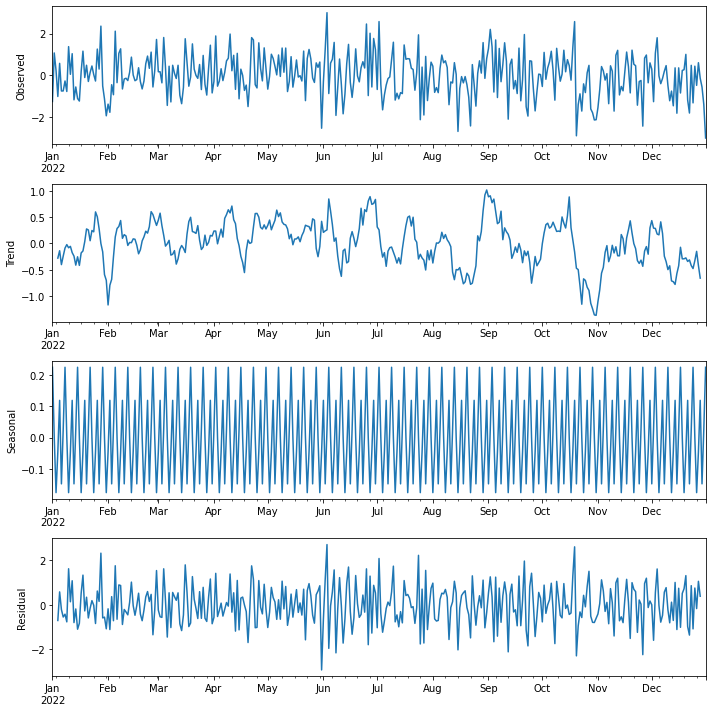

In [49]:
# create a sample DataFrame with daily data for 3 columns
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data_daily = pd.DataFrame(np.random.randn(len(dates), 15), index=dates, 
                          columns=['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',                                    'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',                                    'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'])

# select the columns to decompose
cols = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge','Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',         'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# loop through each selected column and decompose it using seasonal_decompose
for col in cols:
    result = seasonal_decompose(data_daily[col], model='additive')

    # plot the decomposition using matplotlib
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
    result.observed.plot(ax=axes[0])
    axes[0].set_ylabel('Observed')
    result.trend.plot(ax=axes[1])
    axes[1].set_ylabel('Trend')
    result.seasonal.plot(ax=axes[2])
    axes[2].set_ylabel('Seasonal')
    result.resid.plot(ax=axes[3])
    axes[3].set_ylabel('Residual')
    plt.tight_layout()
    plt.show()


In [51]:
# pdq = []
# for name, column in train_diff[[ 'use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'   ]].iteritems():
#     print(f'Searching order of p,d and q for : {name}')
#     stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=5, max_q=5, max_D=1, seasonal=False,
#         trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
#     parameter = stepwise_model.get_params().get('order')
#     print(f'optimal order for:{name} is: {parameter} \n\n')
#     pdq.append(stepwise_model.get_params().get('order'))


In [52]:
# pdq

In [53]:
# pdq = []
# for name, column in train_diff[[ 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen' ]].iteritems():
#     print(f'Searching order of p,d and q for : {name}')
#     stepwise_model = auto_arima(train_diff[name], start_p=1, start_q=1, max_p=5, max_q=5, max_P=2, max_Q=2, seasonal=True, m=12, 
#                                 trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, maxiter=1000)
#     parameter = stepwise_model.get_params().get('order')
#     seasonal_parameter = stepwise_model.get_params().get('seasonal_order')
#     print(f'optimal order for:{name} is: {parameter} \n')
#     print(f'optimal seasonal order for:{name} is: {seasonal_parameter} \n\n')
#     pdq.append(stepwise_model.get_params().get('order'))

In [55]:
# pdq[]

In [56]:
# # Define the (P, D, Q) orders for each variable
# orders = {

#     'use': (1, 0, 1),
#      'gen': (1, 0, 1),
#     'House overall': (1, 0, 1),
#     'Dishwasher': (1, 0, 2),
#     'Home office': (0, 0, 5),
#     'Fridge': (0, 0, 1),
#     'Wine cellar': (0, 0, 1),
#     'Garage door': (3, 0, 1),
#     'Barn': (0, 0, 5),
#     'Well': (2, 0, 2),
#     'Microwave': (5, 0, 0),
#     'Living room': (0, 0, 2),
#     'Solar': (1, 0, 1),
#     'sum_Furnace': (2, 0, 3),
#     'sum_Kitchen': (1, 0, 3)

   
# }

# # Generate synthetic data for one million households
# num_households = 2
# start_date = pd.to_datetime('2015-01-01')
# end_date = pd.to_datetime('2015-12-31')
# date_range = pd.date_range(start=start_date, end=end_date, freq='H')
# synthetic_data = pd.DataFrame(index=date_range)

# for name in orders:
#     print(f'Generating synthetic data for variable: {name}')
#     p, d, q = orders[name]
#     stepwise_model = auto_arima(train_diff[name],order=(p, d, q))
#     arima_model_fit = stepwise_model.fit(train_diff[name])
#     for i in range(num_households):
#         synthetic_data[f'{name}_household_{i+1}'] = arima_model_fit.predict(start=0, end=len(date_range)-1)



In [57]:
# synthetic_data.to_csv('synthetic_data.csv')

In [58]:
# # Define the (P, D, Q) orders for each variable
# orders = {
#     'use': (1, 0, 1),
#      'gen': (1, 0, 1),
#     'House overall': (1, 0, 1),
#     'Dishwasher': (1, 0, 2),
#     'Home office': (0, 0, 5),
#     'Fridge': (0, 0, 1),
#     'Wine cellar': (0, 0, 1),
#     'Garage door': (3, 0, 1),
#     'Barn': (0, 0, 5),
#     'Well': (2, 0, 2),
#     'Microwave': (5, 0, 0),
#     'Living room': (0, 0, 2),
#     'Solar': (1, 0, 1),
#     'sum_Furnace': (2, 0, 3),
#     'sum_Kitchen': (1, 0, 3)
# }

# # Generate synthetic data for one million households
# num_households = 2
# start_date = pd.to_datetime('2015-01-01')
# end_date = pd.to_datetime('2015-12-31')
# date_range = pd.date_range(start=start_date, end=end_date, freq='H')
# synthetic_data = pd.DataFrame(index=date_range)

# for name in orders:
#     print(f'Generating synthetic data for variable: {name}')
#     p, d, q = orders[name]
#     stepwise_model = auto_arima(train_diff[name],order=(p, d, q))
#     arima_model_fit =stepwise_model.fit (train_diff[name]
#     for i in range(num_households):
#         synthetic_data[f'{name}_household_{i+1}'] = arima_model_fit.predict(start=0, end=len(date_range)-1)



In [59]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm


# # Choose the columns to generate synthetic data
# columns = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# # Set the ARIMA model parameters
# p = 0
# d = 1
# q = 0

# # Define the number of rows to generate
# num_rows = 40000

# # Generate synthetic data using the ARIMA model
# synthetic_data = np.empty((num_rows, len(columns)))
# for i, column in enumerate(columns):
#     data = dataset[column].values
#     arima = sm.tsa.ARIMA(data, order=(p, d, q))
#     arima_fit = arima.fit()
#     synthetic_data[:, i] = arima_fit.simulate(nsimulations=num_rows)

# # Save the synthetic data to a CSV file
# pd.DataFrame(synthetic_data, columns=columns).to_csv('synthetic.csv', index=False)


In [60]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# import statsmodels.api as sm


# # Choose the columns to generate synthetic data
# columns = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# # Set the ARIMA model parameters
# p = 0
# d = 1
# q = 0

# # Generate synthetic data using the ARIMA model
# synthetic_data = np.empty((len(dataset), len(columns)))
# for i, column in enumerate(columns):
#     data = dataset[column].values
#     arima = sm.tsa.ARIMA(data, order=(p, d, q))
#     arima_fit = arima.fit()
#     synthetic_data[:, i] = arima_fit.simulate(nsimulations=len(dataset))

# # Normalize the synthetic data
# scaler = MinMaxScaler()
# synthetic_data_norm = scaler.fit_transform(synthetic_data)

# # Save the normalized synthetic data to a CSV file
# pd.DataFrame(synthetic_data_norm, columns=columns).to_csv('synthetic_norm 1.csv', index=False)

In [61]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# import statsmodels.api as sm


# # Choose the columns to generate synthetic data
# columns = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# # Set the ARIMA model parameters
# p = 1
# d = 0
# q = 1

# # Generate synthetic data using the ARIMA model
# synthetic_data = np.empty((len(dataset), len(columns)))
# for i, column in enumerate(columns):
#     data = dataset[column].values
#     arima = sm.tsa.ARIMA(data, order=(p, d, q))
#     arima_fit = arima.fit()
#     synthetic_data[:, i] = arima_fit.simulate(nsimulations=len(dataset))

# # Normalize the synthetic data
# scaler = MinMaxScaler()
# synthetic_data_norm = scaler.fit_transform(synthetic_data)

# # Save the normalized synthetic data to a CSV file
# pd.DataFrame(synthetic_data_norm, columns=columns).to_csv('synthetic_norm 2.csv', index=False)

In [63]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# import pmdarima as pm


# # Choose the columns to generate synthetic data
# columns = ['gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# # Generate synthetic data using auto ARIMA
# synthetic_data = np.empty((len(dataset), len(columns)))
# for i, column in enumerate(columns):
#     data = dataset[column].values
#     arima_model = pm.auto_arima(data, suppress_warnings=True)
#     synthetic_data[:, i] = arima_model.predict(n_periods=len(dataset))

# # Normalize the synthetic data
# scaler = MinMaxScaler()
# synthetic_data_norm = scaler.fit_transform(synthetic_data)

# # Save the normalized synthetic data to a CSV file
# pd.DataFrame(synthetic_data_norm, columns=columns).to_csv('synthetic_norm_auto.csv', index=False)

In [64]:
# import numpy as np
# import pandas as pd
# import pmdarima as pm


# # Choose the columns to generate synthetic data
# columns = ['gen', 'House overall', 'Dishwasher']

# # Generate synthetic data using the ARIMA model with optimal parameters
# np.random.seed(123)
# synthetic_data = np.empty((len(dataset), len(columns)))
# for i, column in enumerate(columns):
#     data = dataset[column].values
#     arima = pm.auto_arima(data, seasonal=False, stepwise=True, suppress_warnings=True)
#     synthetic_data[:, i] = arima.predict(n_periods=len(dataset))

# # Save the synthetic data to a CSV file
# pd.DataFrame(synthetic_data, columns=columns).to_csv('synthetic_data.csv', index=False)

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
dataset1 = pd.read_csv('synthetic_norm 1 (1).csv')

# Specify delimiter used in CSV file
dataset2 = pd.read_csv('HomeC-meter1_2015.csv')


In [66]:
dataset1.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [67]:
dataset2.columns

Index(['Date & Time', 'use [kW]', 'gen [kW]', 'House overall [kW]',
       'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
       'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]',
       'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]',
       'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
       'Living room [kW]', 'Solar [kW]'],
      dtype='object')

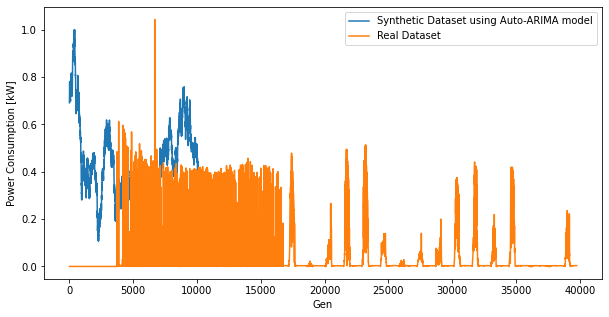

In [69]:
# Extract column of interest
column_name = 'column_name'
column1 = dataset1['gen']
column2 = dataset2['gen [kW]']

# # Create plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# # Plot data for dataset1
# ax1.plot(column1, label='Synthetic Dataset')
# ax1.set_xlabel('X label')
# ax1.set_ylabel('Power Consumption [kW]')
# ax1.legend()

# # Plot data for dataset2
# ax2.plot(column2, label='Real Dataset')
# ax2.set_xlabel('X label')
# ax2.set_ylabel('Power Consumption [kW]')
# ax2.legend()

# # Display the plots
# plt.show()


# Create plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data for dataset1 and dataset2
ax.plot(column1, label='Synthetic Dataset using Auto-ARIMA model')
ax.plot(column2, label='Real Dataset')
ax.set_xlabel('Gen')
ax.set_ylabel('Power Consumption [kW]')
ax.legend()

# Display the plot
plt.show()